<a href="https://colab.research.google.com/github/Waye/CSC420-CourseWork-fall2019/blob/master/Tutorial/CSC420_2019_Tutorial_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/Colab Notebooks"

CSC420_2019_Tutorial_A.ipynb


In [0]:
# install OpenCV
!pip install opencv-python

# the usual ...
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [0]:
# read an image (make sure CavePainting.jpg is in the main folder in your Google Drive)
img = cv2.imread('/content/drive/My Drive/image/CavePainting.jpg') # READS IN NUMPY ARRAY

In [0]:
whos

Variable   Type       Data/Info
-------------------------------
cv2        module     <module 'cv2.cv2' from '/<...>36m-x86_64-linux-gnu.so'>
drive      module     <module 'google.colab.dri<...>s/google/colab/drive.py'>
img        ndarray    453x676x3: 918684 elems, type `uint8`, 918684 bytes (897.15234375 kb)
np         module     <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
plt        module     <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>


In [0]:
# not in colab
#cv2.imshow('image',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

(453, 676, 3)


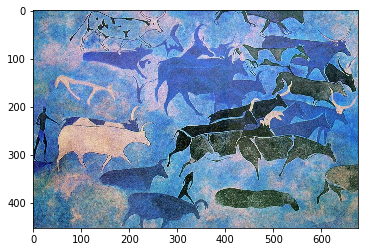

In [0]:
# display the image
h,w = img.shape[:2]
print(img.shape)
plt.imshow(img,cmap='gray')
plt.show()
# what happened?

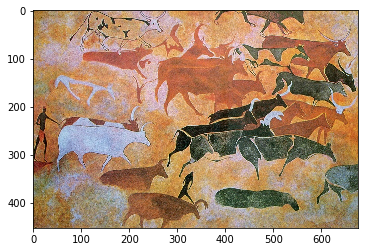

In [0]:
# BGR <--> RGB
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

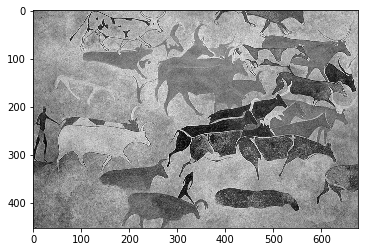

In [0]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

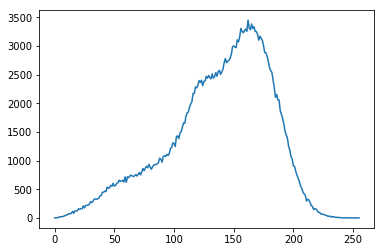

In [0]:
hist = cv2.calcHist([gray],[0],None,[256],[0,256])
plt.plot(hist)

In [0]:
whos

Variable     Type        Data/Info
----------------------------------
cv2          module      <module 'cv2.cv2' from '/<...>36m-x86_64-linux-gnu.so'>
cv2_imshow   function    <function cv2_imshow at 0x7f44aaa57b70>
drive        module      <module 'google.colab.dri<...>s/google/colab/drive.py'>
gray         ndarray     453x676: 306228 elems, type `uint8`, 306228 bytes (299.05078125 kb)
h            int         453
hist         ndarray     256x1: 256 elems, type `float32`, 1024 bytes
img          ndarray     453x676x3: 918684 elems, type `uint8`, 918684 bytes (897.15234375 kb)
img2         ndarray     453x676x3: 918684 elems, type `uint8`, 918684 bytes (897.15234375 kb)
np           module      <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
plt          module      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
w            int         676


In [0]:
# let's make a function
def imshowBGR2RGB( im ):
  img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.axis('off')
  return

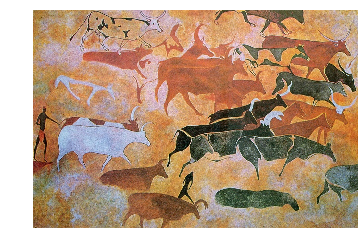

In [0]:
imshowBGR2RGB(img)

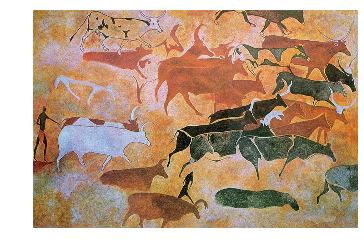

In [0]:
# scaling 
rows, cols = img.shape[:2]
res = cv2.resize(img, (2*cols, 2*rows), interpolation = cv2.INTER_CUBIC)
imshowBGR2RGB(res)

In [0]:
whos

Variable        Type        Data/Info
-------------------------------------
cols            int         676
cv2             module      <module 'cv2.cv2' from '/<...>36m-x86_64-linux-gnu.so'>
cv2_imshow      function    <function cv2_imshow at 0x7f44aaa57b70>
drive           module      <module 'google.colab.dri<...>s/google/colab/drive.py'>
gray            ndarray     453x676: 306228 elems, type `uint8`, 306228 bytes (299.05078125 kb)
h               int         453
hist            ndarray     256x1: 256 elems, type `float32`, 1024 bytes
img             ndarray     453x676x3: 918684 elems, type `uint8`, 918684 bytes (897.15234375 kb)
img2            ndarray     453x676x3: 918684 elems, type `uint8`, 918684 bytes (897.15234375 kb)
imshowBGR2RGB   function    <function imshowBGR2RGB at 0x7f44a5fef8c8>
np              module      <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
plt             module      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
res             ndar

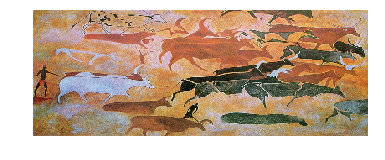

In [0]:
# scaling 
res = cv2.resize(img,(400, 150), interpolation = cv2.INTER_CUBIC)
imshowBGR2RGB(res)

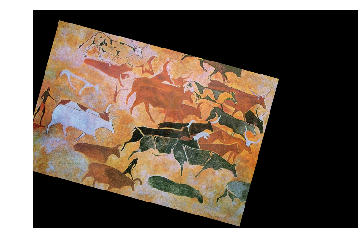

In [0]:
# rotate (centre, angle, scale)
M = cv2.getRotationMatrix2D((100, 120), -15, .7)
dst = cv2.warpAffine(img, M, (cols,rows))
imshowBGR2RGB(dst)

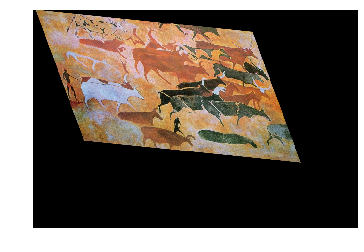

In [0]:
# affine transformation
pts1 = np.float32([[5,5],[5,50],[50,5]])
pts2 = np.float32([[10,3],[20,30],[40,6]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

imshowBGR2RGB(dst)

In [0]:
# perspective transformation

# getPerspectiveTransform

# how many point matches do we need?

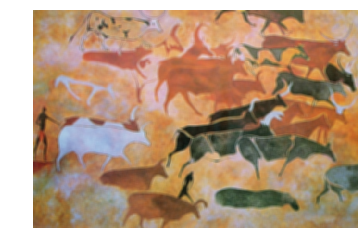

In [0]:
# averaging

kernel = np.ones((7,7),np.float32)/49
dst = cv2.filter2D(img,-1,kernel)

imshowBGR2RGB(dst)

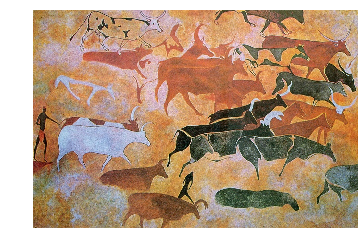

In [0]:
# compare with the original
imshowBGR2RGB(img)

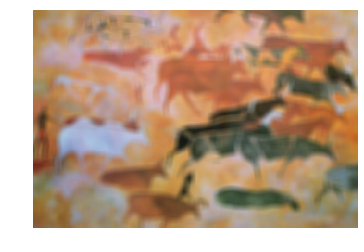

In [0]:
# larger window
kernel = np.ones((15,15),np.float32)/225
dst = cv2.filter2D(img,-1,kernel)

imshowBGR2RGB(dst)

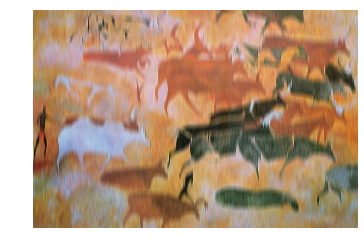

In [0]:
# Gaussian blur
kernel = cv2.getGaussianKernel(15, 9)

dst = cv2.filter2D(img,-1,kernel)

imshowBGR2RGB(dst)

# alternative: GaussianBlur(img,(15,15),20) 

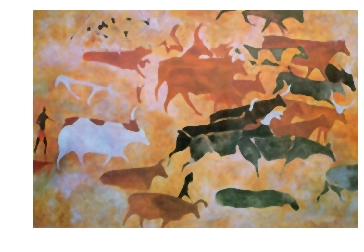

In [0]:
median = cv2.medianBlur(img, 7)
imshowBGR2RGB(median)

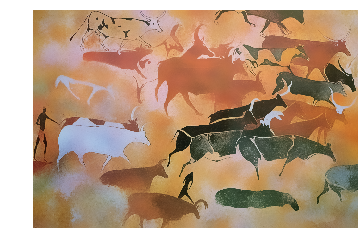

In [0]:
blur = cv2.bilateralFilter(img,30,75,75)
imshowBGR2RGB(blur)

(Text(0.5, 1.0, 'Laplacian'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

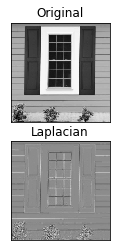

In [0]:
# image gradients
img = cv2.imread('/content/drive/My Drive/image/window.jpg') # READS IN NUMPY ARRAY
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
#imshowBGR2RGB(laplacian)


plt.subplot(2,1,1),plt.imshow(gray,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,1,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

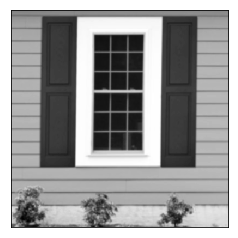

In [0]:
#median = cv2.medianBlur(gray, 5)
blur = cv2.GaussianBlur(gray,(5,5),1)
plt.imshow(blur, cmap = 'gray')
plt.xticks([]), plt.yticks([])


(Text(0.5, 1.0, 'Laplacian'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

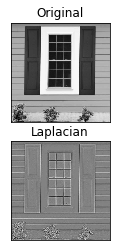

In [0]:
# smooth first

laplacian = cv2.Laplacian(blur, cv2.CV_64F)

plt.subplot(2,1,1),plt.imshow(gray,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,1,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Sobel Y'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

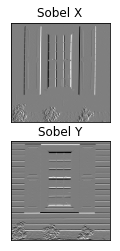

In [0]:
sobelx = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=5)

plt.subplot(2,1,1),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,1,2),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])


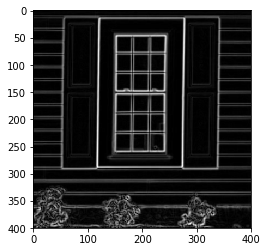

In [0]:
sobel_xy = abs(sobelx) + abs(sobely);
plt.imshow(sobel_xy,cmap='gray')

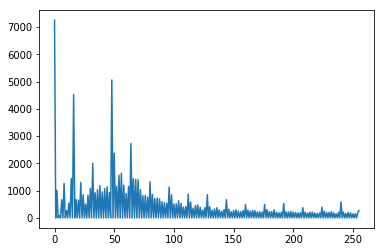

In [0]:
hist,bins = np.histogram(sobel_xy,256,[0,256])
plt.plot(hist)

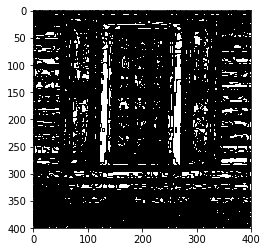

In [0]:
th = sobel_xy < 20
plt.imshow(th, cmap='gray')

(Text(0.5, 1.0, 'Edge Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

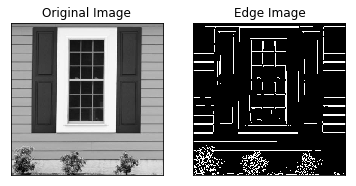

In [0]:
# edges (Canny)
edges = cv2.Canny(gray, 75, 100)

plt.subplot(1, 2, 1),plt.imshow(gray, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2, 2),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

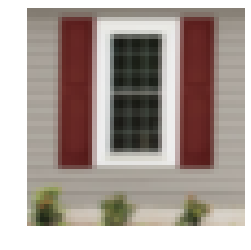

In [0]:
lowres = cv2.pyrDown(img)
lowres = cv2.pyrDown(lowres)
lowres = cv2.pyrDown(lowres)
imshowBGR2RGB(lowres)

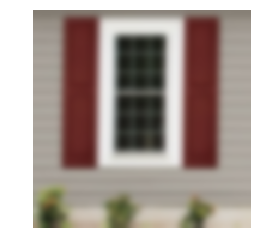

In [0]:
highres = cv2.pyrUp(lowres)
highres = cv2.pyrUp(highres)
highres = cv2.pyrUp(highres)
imshowBGR2RGB(highres)

**more:** [OpenCV-Python Tutorials](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)
